<a href="https://colab.research.google.com/github/mohamedtal/PFE2021/blob/main/03_01_2021_getWidthHeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# at first we need to get the dataset from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip the dataset
!unzip /content/drive/MyDrive/dataset/DR-dataset2015.zip

In [ ]:
from PIL import Image
import numpy as np
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def cropDisk(imagePath):
    image = np.array(Image.open(image_path))
    # bordures et corners
    row, col = image.shape[0], image.shape[1]
    center_row, center_col = row // 2, col // 2
    x_left, x_right, y_top, y_bot = 0, col, 0, row
    while image[center_row, x_left:x_left + 10].mean().max() <= 10 and x_left < col:
        x_left += 1
    while image[center_row, x_right - 10:x_right].mean().max() <= 10 and x_right > 0:
        x_right -= 1
    while image[y_top:y_top + 10, center_col].mean().max() <= 10 and y_top < row:
        y_top += 1
    while image[y_bot - 10:y_bot, center_col].mean().max() <= 10 and y_bot > 0:
        y_bot -= 1
    if y_top < y_bot and x_left < x_right and y_bot - y_top > 0.6 * row and x_right - x_left > 0.6 * col:
        image = image[y_top:y_bot, x_left:x_right]
    return [image.shape[0],image.shape[1]]



def create_dataset(pathFolder):
    # create the csv file
    with open("widthHeight.csv", "w") as outfile:
        myWriter = csv.writer(outfile, delimiter=',')
        myWriter.writerow(["width", "height"])
        for directory in os.listdir(pathFolder):
            for file in os.listdir(os.path.join(pathFolder, directory)):
                image_path= os.path.join(pathFolder, directory,  file)
                heightWidth = cropDisk(image_path)
                myWriter.writerow([heightWidth[1], heightWidth[0]])

In [ ]:
create_dataset("DR-dataset/train")

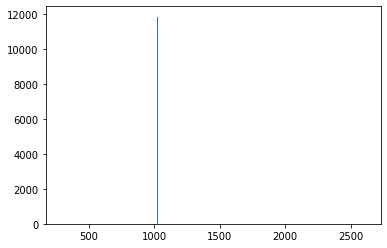

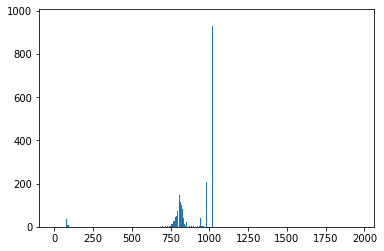

In [ ]:
# now we do somme statistics
# read the columns
col_list = ["width", "height"]
df = pd.read_csv("widthHeight.csv", usecols=col_list)
widthData = df["width"]
heightData = df["height"]

plt.hist(widthData, bins = widthData.max()-widthData.min())
plt.show()

plt.hist(heightData, bins = heightData.max()-heightData.min())
plt.show()

In [ ]:
print(widthData.max())

2612
